In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.6 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [3]:
output = "/sci/courses/2023/92892/noa_gilad/final_project/"
path_out=f'{output}plot/'
os.popen(f'mkdir -p {path_out}')

In [4]:
# Read the matrix and sample matrix using pandas
matrix_file = "/sci/courses/2023/92892/noa_gilad/final_project/GSE158802_counts.tsv"
sample_matrix_file = "/sci/courses/2023/92892/noa_gilad/final_project/GSE158802_samples.tsv"

# Read the matrix with the first column as row names
matrix = pd.read_csv(matrix_file, delimiter='\t', index_col=0)
sample_matrix = pd.read_csv(sample_matrix_file, delimiter='\t')

# Extract the column names present in the sample matrix
columns_to_keep = sample_matrix['Name']

# Keep only the columns present in the sample matrix in the matrix DataFrame
matrix_filtered = matrix.loc[:, matrix.columns.isin(columns_to_keep)]
matrix_filtered.dropna(inplace=True)

#change names
ensembel_to_names = "/sci/courses/2023/92892/noa_gilad/final_project/name_genes.tsv"
names = pd.read_csv(ensembel_to_names, delimiter='\t')
mapping = dict(zip(names['Gene stable ID version'], names['Gene name']))
matrix_filtered.rename(index=mapping, inplace=True)

mapping_stripped = dict(zip(names['Gene stable ID version'].str.split('.', expand=True)[0], names['Gene name']))
# Function to strip the suffix '.9' from gene IDs
def strip_suffix(gene_id):
    return gene_id.split('.')[0]

# Rename the rows in matrix_filtered
for index in matrix_filtered.index:
    stripped_index = strip_suffix(str(index))
    if stripped_index in mapping_stripped:
        matrix_filtered.rename(index={index: mapping_stripped[stripped_index]}, inplace=True)

matrix_filtered = matrix_filtered.groupby(matrix_filtered.index).sum()

# save the filtered data
filtered_counts = "/sci/courses/2023/92892/noa_gilad/final_project/filtered_counts.tsv"
matrix_filtered.to_csv(filtered_counts, sep='\t')
matrix_filtered

/tmp/ipykernel_129637/2822506631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_filtered.dropna(inplace=True)
/tmp/ipykernel_129637/2822506631.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_filtered.rename(index=mapping, inplace=True)
/tmp/ipykernel_129637/2822506631.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_filtered.rename(index={index: mapping_stripped[stripped_index]}, inplace=True)


,P3432_193,P3432_194,P3432_195,P3432_196,P3432_197,P3432_198,P3432_199,P3432_200,P3432_201,P3432_203,...,P3432_273,P3432_274,P3432_275,P3432_276,P3432_277,P3432_278,P3432_281,P3432_282,P3432_283,P3432_286
gene,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00
5_8S_rRNA,0.0,0.0,0.0,0.00,0.36,0.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.00,1.5,1.5,0.00,0.0,0.0,0.0,0.39
7SK,0.0,1140.2,0.0,509.38,272.00,0.0,0.0,13.0,0.0,948.0,...,0.0,0.0,1359.98,51.0,29.0,107.47,0.0,0.0,127.0,0.00
A1BG,3.0,0.0,0.0,0.00,0.00,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,6.00,0.0,0.0,0.00,0.0,3.0,1.0,0.00
A1BG-AS1,4.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.0,0.0,0.00,1.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,24.0,0.0,0.0,16.00,99.00,53.0,80.0,84.0,0.0,87.0,...,11.0,98.0,74.00,111.0,0.0,13.00,50.0,15.0,111.0,1.00
hsa-mir-1253,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00
hsa-mir-423,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00


In [5]:
if os.path.exists(f'{output}oocytes_raw_data.h5ad'):
    geneExpMat = sc.read_h5ad(f'{output}oocytes_raw_data.h5ad')
else:
    geneExpMat = sc.read_csv(filtered_counts, delimiter='\t', first_column_names=True).T
    geneExpMat.write_h5ad(f'{output}oocytes_raw_data.h5ad')

In [6]:
maturation_stage_dict = dict(zip(sample_matrix['Name'], sample_matrix['Maturation_stage']))
maturation_stage_dict['P3432_203'] = 'GV'
geneExpMat.obs['Maturation stage'] = geneExpMat.obs.index.map(maturation_stage_dict)
geneExpMat.obs

,Maturation stage
P3432_193,GV
P3432_194,GV
P3432_195,MII
P3432_196,GV
P3432_197,MII
...,...
P3432_278,GV
P3432_281,GV
P3432_282,GV
P3432_283,GV


normalizing counts per cell
    finished (0:00:00)


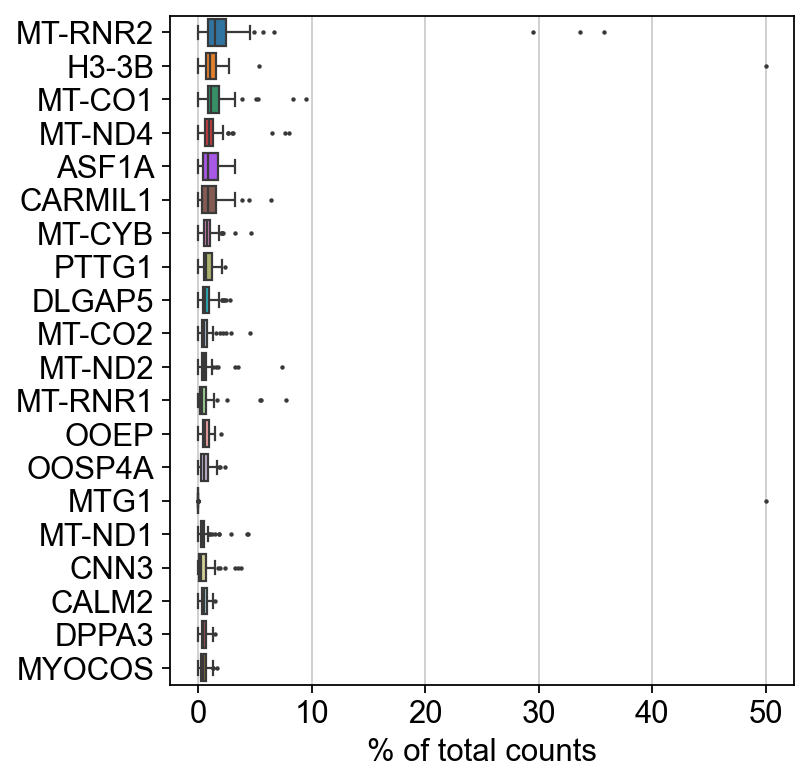

In [41]:
sc.pl.highest_expr_genes(geneExpMat, n_top=20)

In [8]:
sc.pp.filter_cells(geneExpMat, min_counts=0)
sc.pp.filter_cells(geneExpMat, min_genes=0)
sc.pp.filter_genes(geneExpMat, min_counts=100)

filtered out 29562 genes that are detected in less than 100 counts


In [9]:
geneExpMat.var["mt"] = geneExpMat.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    geneExpMat, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11

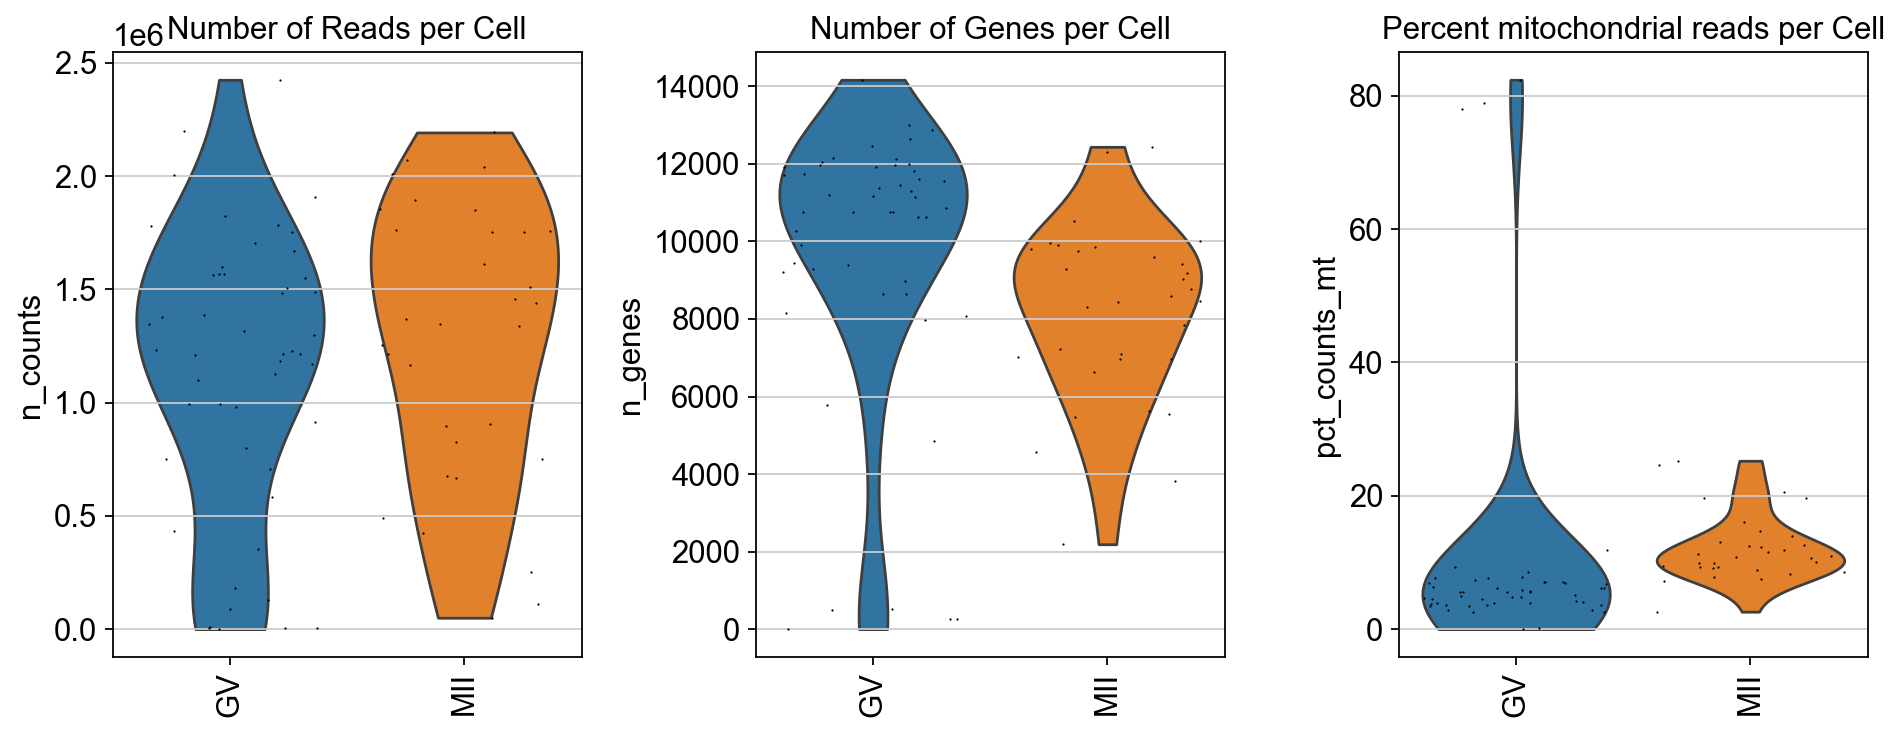

In [10]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sc.pl.violin(geneExpMat, ['n_counts'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90, ax=ax[0]) 
ax[0].set_title('Number of Reads per Cell')
sc.pl.violin(geneExpMat, ['n_genes'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90,ax=ax[1]) 
ax[1].set_title('Number of Genes per Cell')
sc.pl.violin(geneExpMat, ['pct_counts_mt'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90,ax=ax[2]) 
ax[2].set_title('Percent mitochondrial reads per Cell')
fig.tight_layout()
fig.savefig(f'{path_out}before_filtering.pdf')

In [11]:
geneExpMat_org = geneExpMat.copy()
# filter by violin values
geneExpMat_filtered = geneExpMat[(geneExpMat.obs.n_genes > 5000), :].copy()
geneExpMat_filtered = geneExpMat_filtered[(geneExpMat_filtered.obs.pct_counts_mt < 30), :].copy()
geneExpMat_filtered

AnnData object with n_obs × n_vars = 73 × 11684
    obs: 'Maturation stage', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Maturation stage_colors'

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11

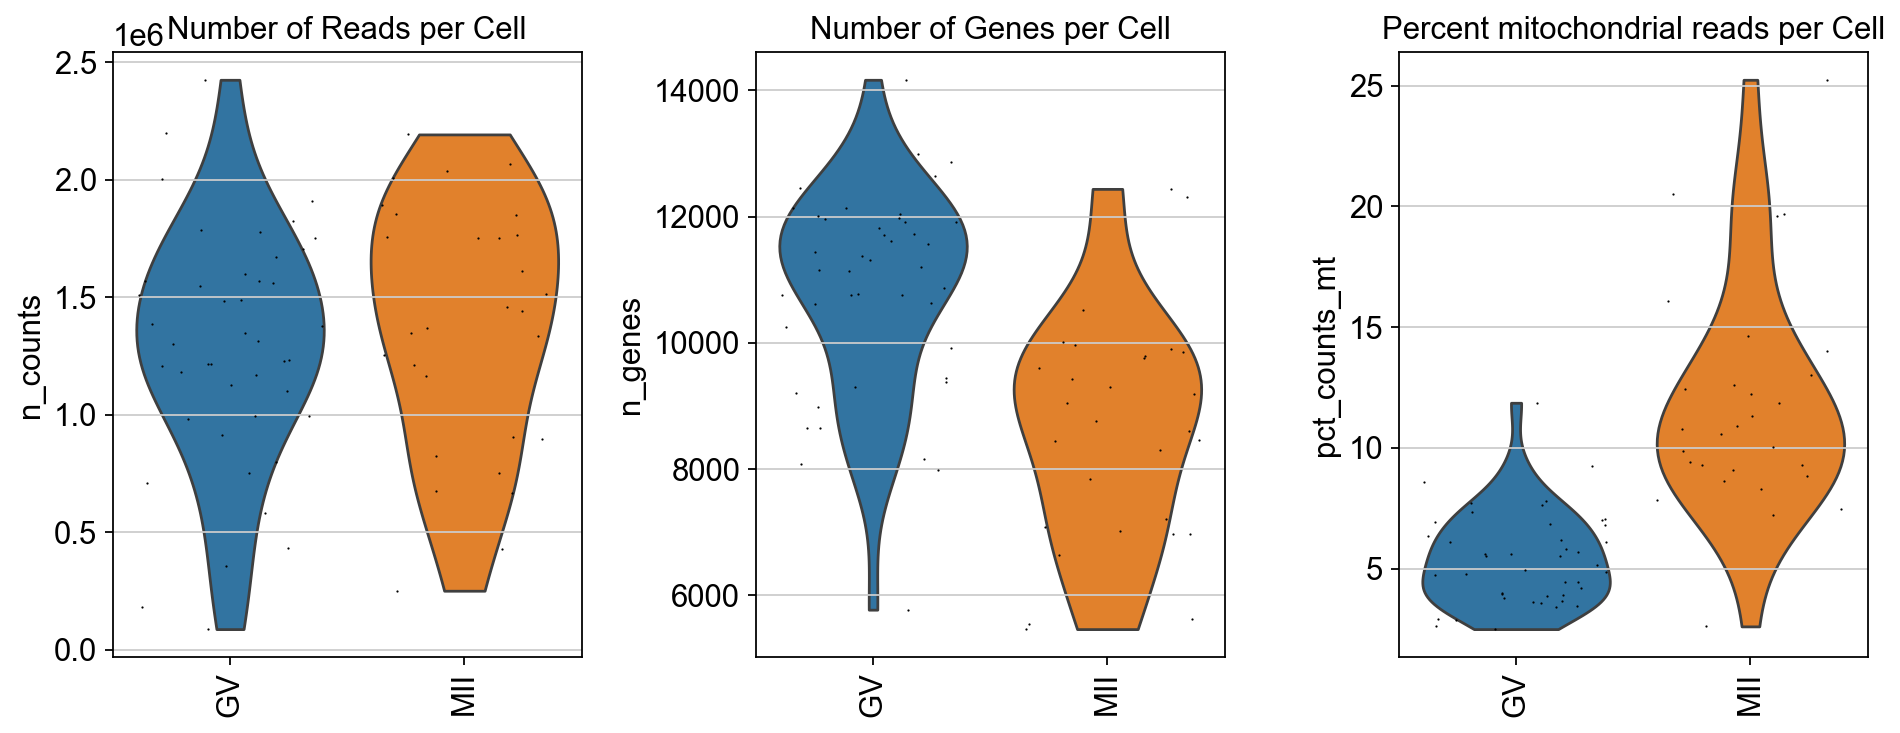

In [12]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sc.pl.violin(geneExpMat_filtered, ['n_counts'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90, ax=ax[0]) 
ax[0].set_title('Number of Reads per Cell')
sc.pl.violin(geneExpMat_filtered, ['n_genes'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90,ax=ax[1]) 
ax[1].set_title('Number of Genes per Cell')
sc.pl.violin(geneExpMat_filtered, ['pct_counts_mt'], groupby= 'Maturation stage', jitter=0.4, show=False, rotation=90,ax=ax[2]) 
ax[2].set_title('Percent mitochondrial reads per Cell')
fig.tight_layout()
fig.savefig(f'{path_out}after_filtering.pdf')

In [13]:
sc.pp.normalize_total(geneExpMat_filtered, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [14]:
sc.pp.log1p(geneExpMat_filtered)

In [15]:
sc.pp.highly_variable_genes(geneExpMat_filtered, n_top_genes=3000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


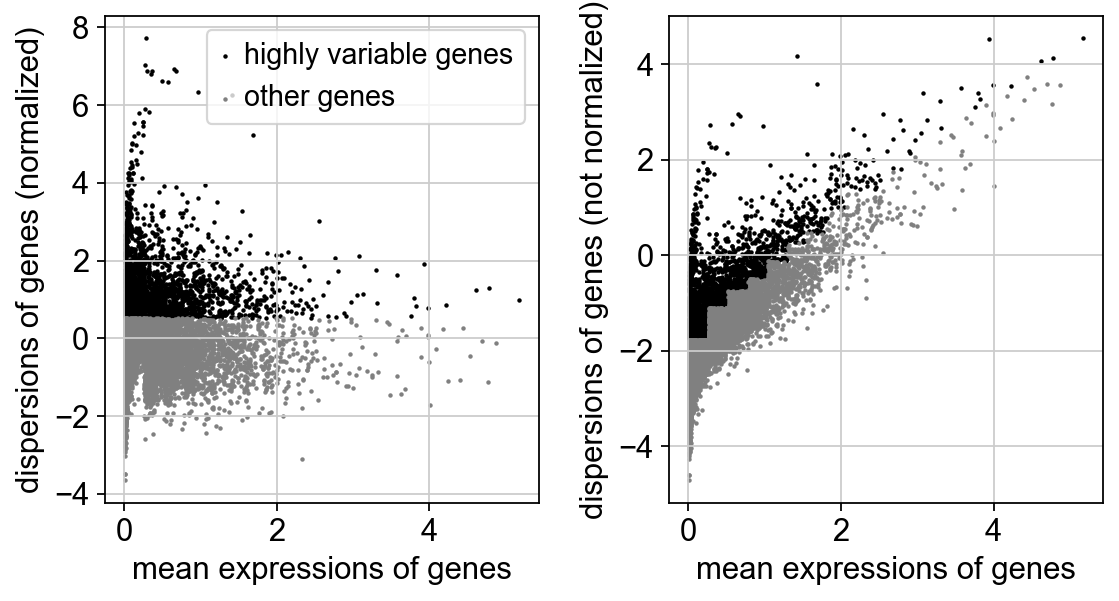

In [16]:
sc.pl.highly_variable_genes(geneExpMat_filtered)

In [17]:
geneExpMat_filtered.raw = geneExpMat_filtered

In [18]:
sc.pp.scale(geneExpMat_filtered, max_value=10)

In [19]:
sc.tl.pca(geneExpMat_filtered)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


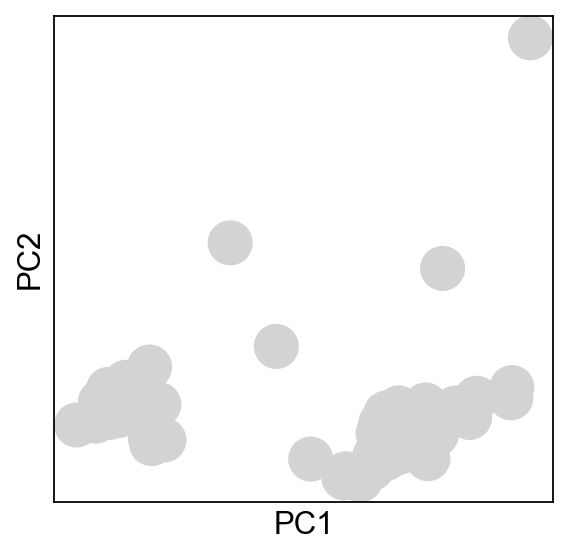

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


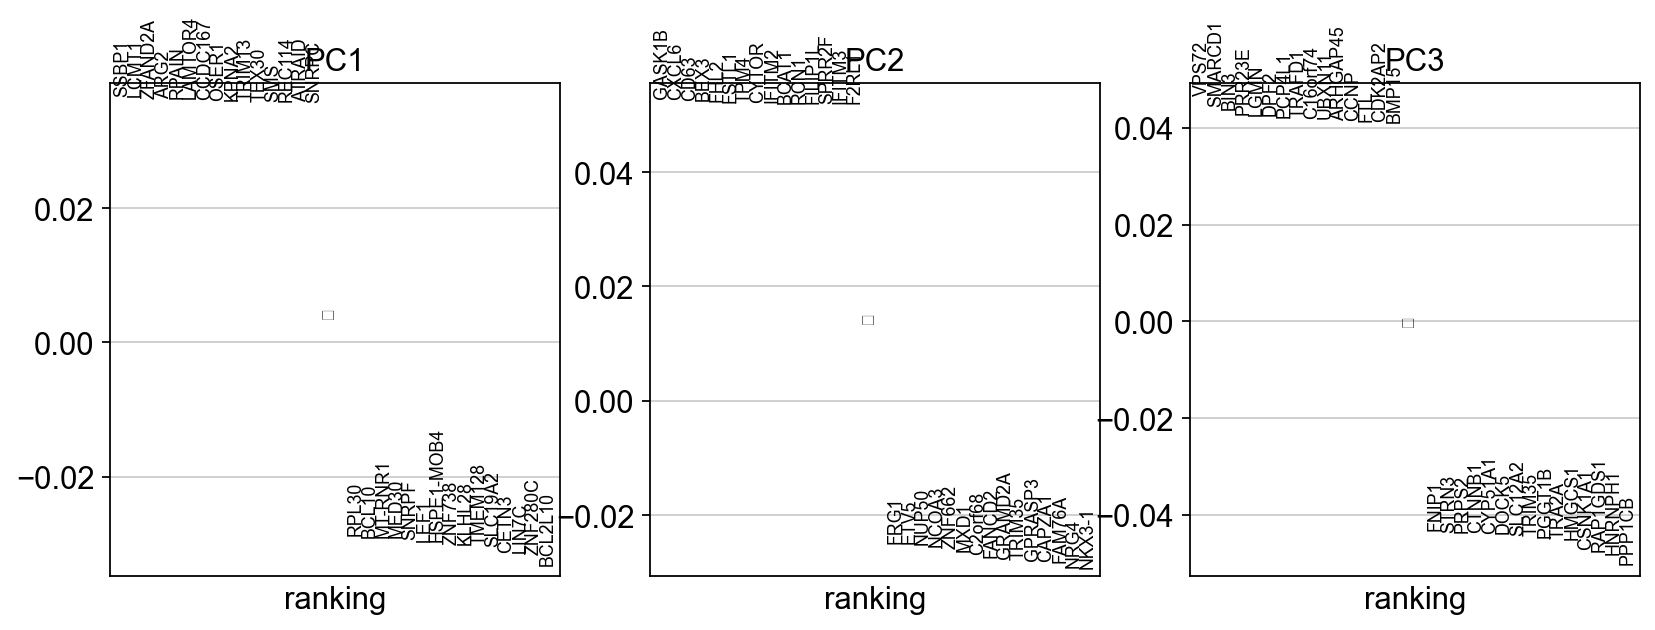

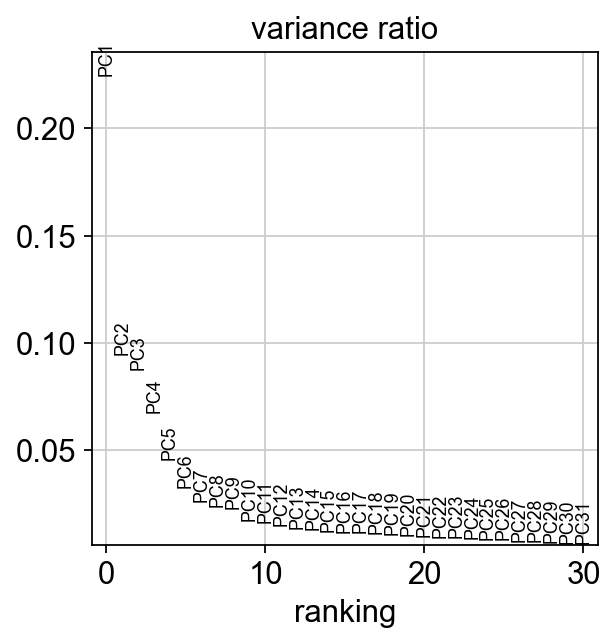

In [20]:
sc.pl.pca_overview(geneExpMat_filtered)

In [21]:
sc.pp.neighbors(geneExpMat_filtered,n_pcs=25)
sc.tl.umap(geneExpMat_filtered)
sc.tl.leiden(geneExpMat_filtered,resolution=0.2)

computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)
running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value t

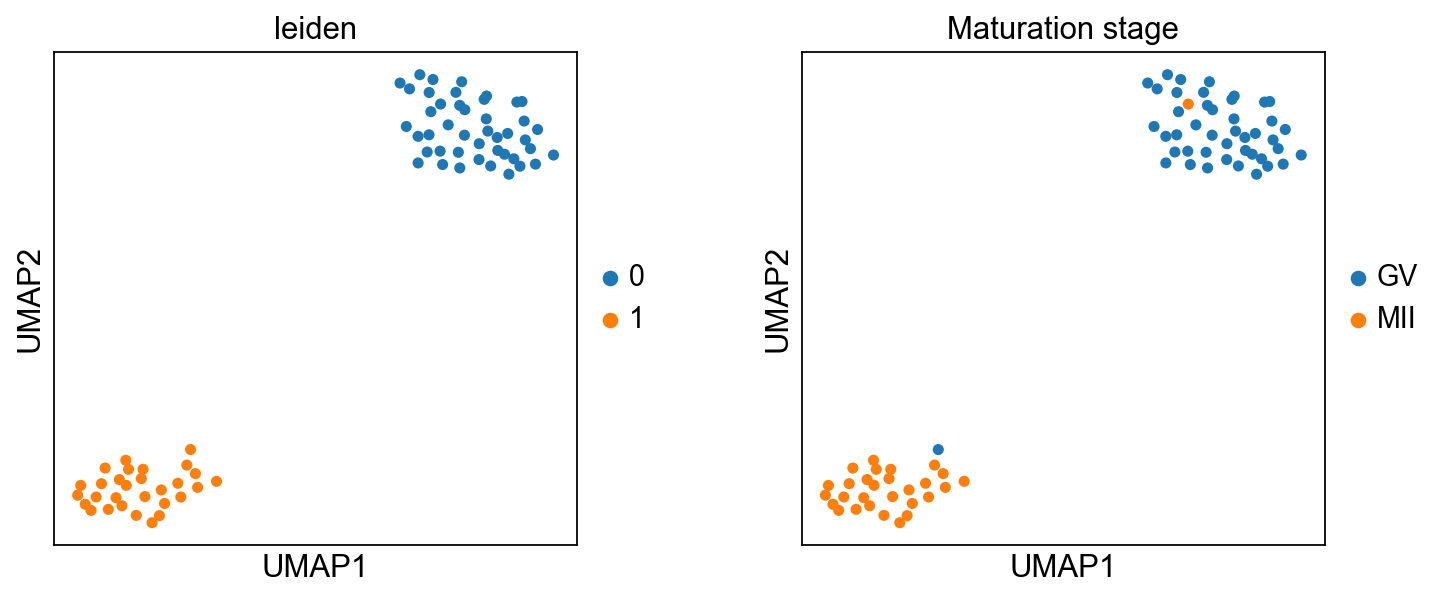

In [43]:
sc.pl.umap(geneExpMat_filtered,color=['leiden', 'Maturation stage'],wspace=0.3,s=100)

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11

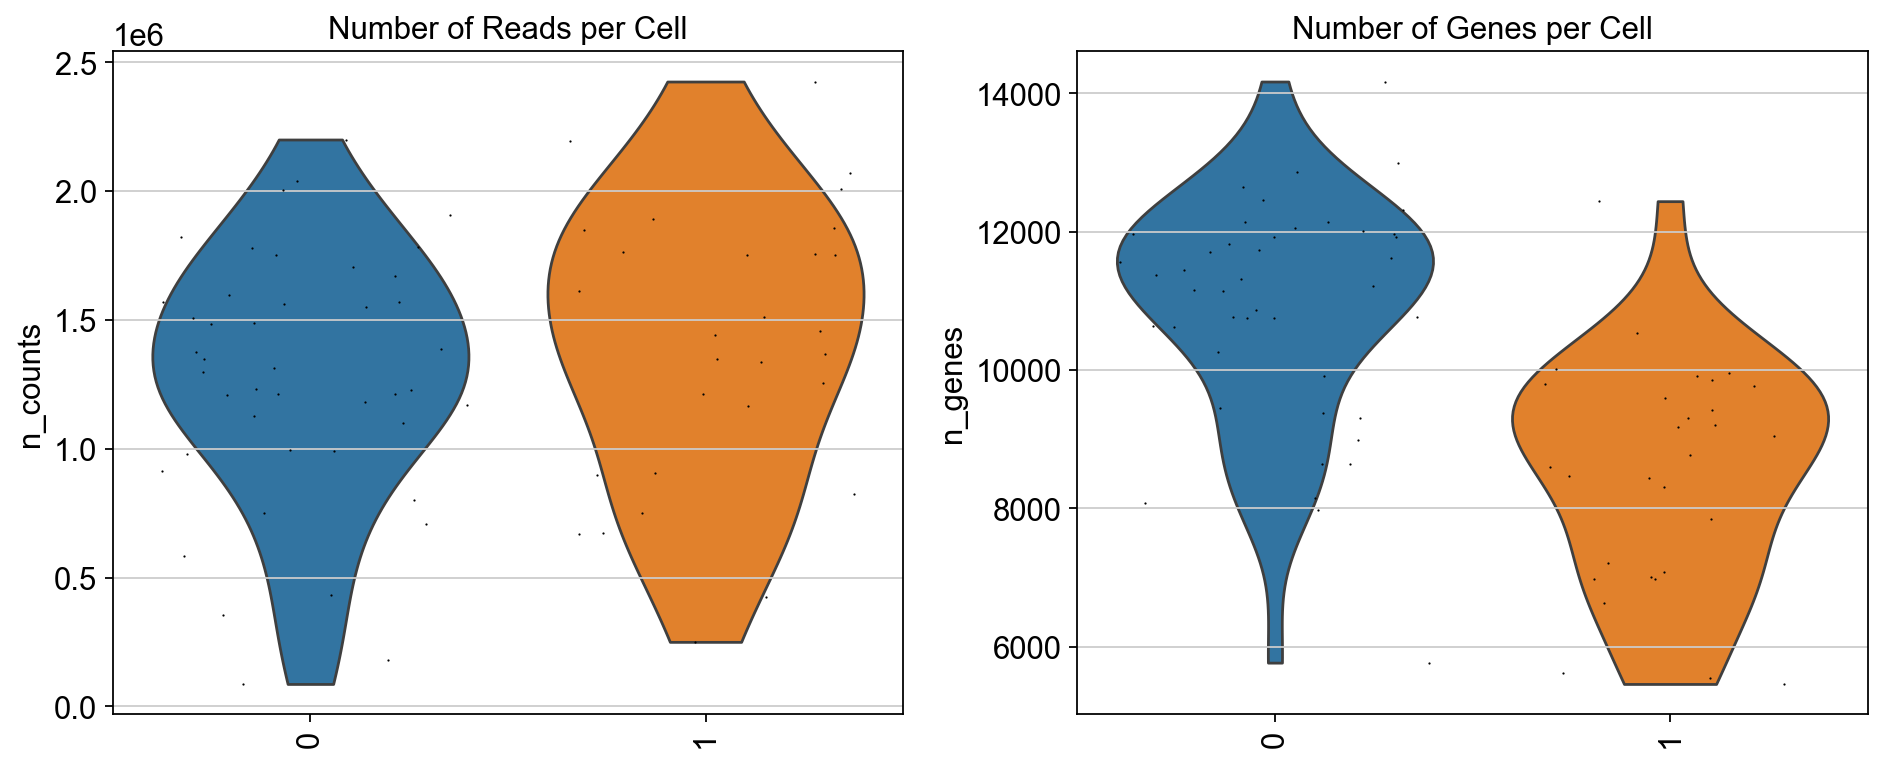

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sc.pl.violin(geneExpMat_filtered, ['n_counts'], groupby= 'leiden', jitter=0.4, show=False, rotation=90, ax=ax[0]) 
ax[0].set_title('Number of Reads per Cell')
sc.pl.violin(geneExpMat_filtered, ['n_genes'], groupby= 'leiden', jitter=0.4, show=False, rotation=90,ax=ax[1]) 
ax[1].set_title('Number of Genes per Cell')
fig.tight_layout()

In [24]:
sc.tl.rank_genes_groups(geneExpMat_filtered,'Maturation stage',method='t-test', pval_cutoff=0.01, logfoldchange_cutoff=2)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [25]:
results = geneExpMat_filtered.uns['rank_genes_groups']
results

{'params': {'groupby': 'Maturation stage',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('GTF3C6', 'BCL2L10'), ('CSTB', 'ADD3'), ('ATRAID', 'SLC4A7'),
            ..., ('SLC4A7', 'ATRAID'), ('ADD3', 'CSTB'),
            ('BCL2L10', 'GTF3C6')],
           dtype=[('GV', 'O'), ('MII', 'O')]),
 'scores': rec.array([( 20.66405 ,  13.648419), ( 20.172228,  12.454086),
            ( 19.249123,  12.215226), ..., (-12.215226, -19.249123),
            (-12.454086, -20.172228), (-13.648419, -20.66405 )],
           dtype=[('GV', '<f4'), ('MII', '<f4')]),
 'pvals': rec.array([(1.22600371e-28, 5.75784828e-21),
            (3.00531541e-27, 2.17533955e-19),
            (5.33232675e-29, 1.13210016e-18), ...,
            (1.13210016e-18, 5.33232675e-29),
            (2.17533955e-19, 3.00531541e-27),
            (5.75784828e-21, 1.22600371e-28)],
           dtype=[('GV', '<f8'), ('MII', '<f8')]),
 'pvals_adj

In [26]:
groups = results['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: results[key][group]
     for group in groups for key in ['names', 'pvals_adj']}).to_csv(f'{path_out}oocytes_gene_signatures_clusters.csv')

In [27]:
markers = pd.DataFrame(geneExpMat_filtered.uns['rank_genes_groups']['names']).iloc[:10,:].to_numpy().flatten('F').tolist()

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


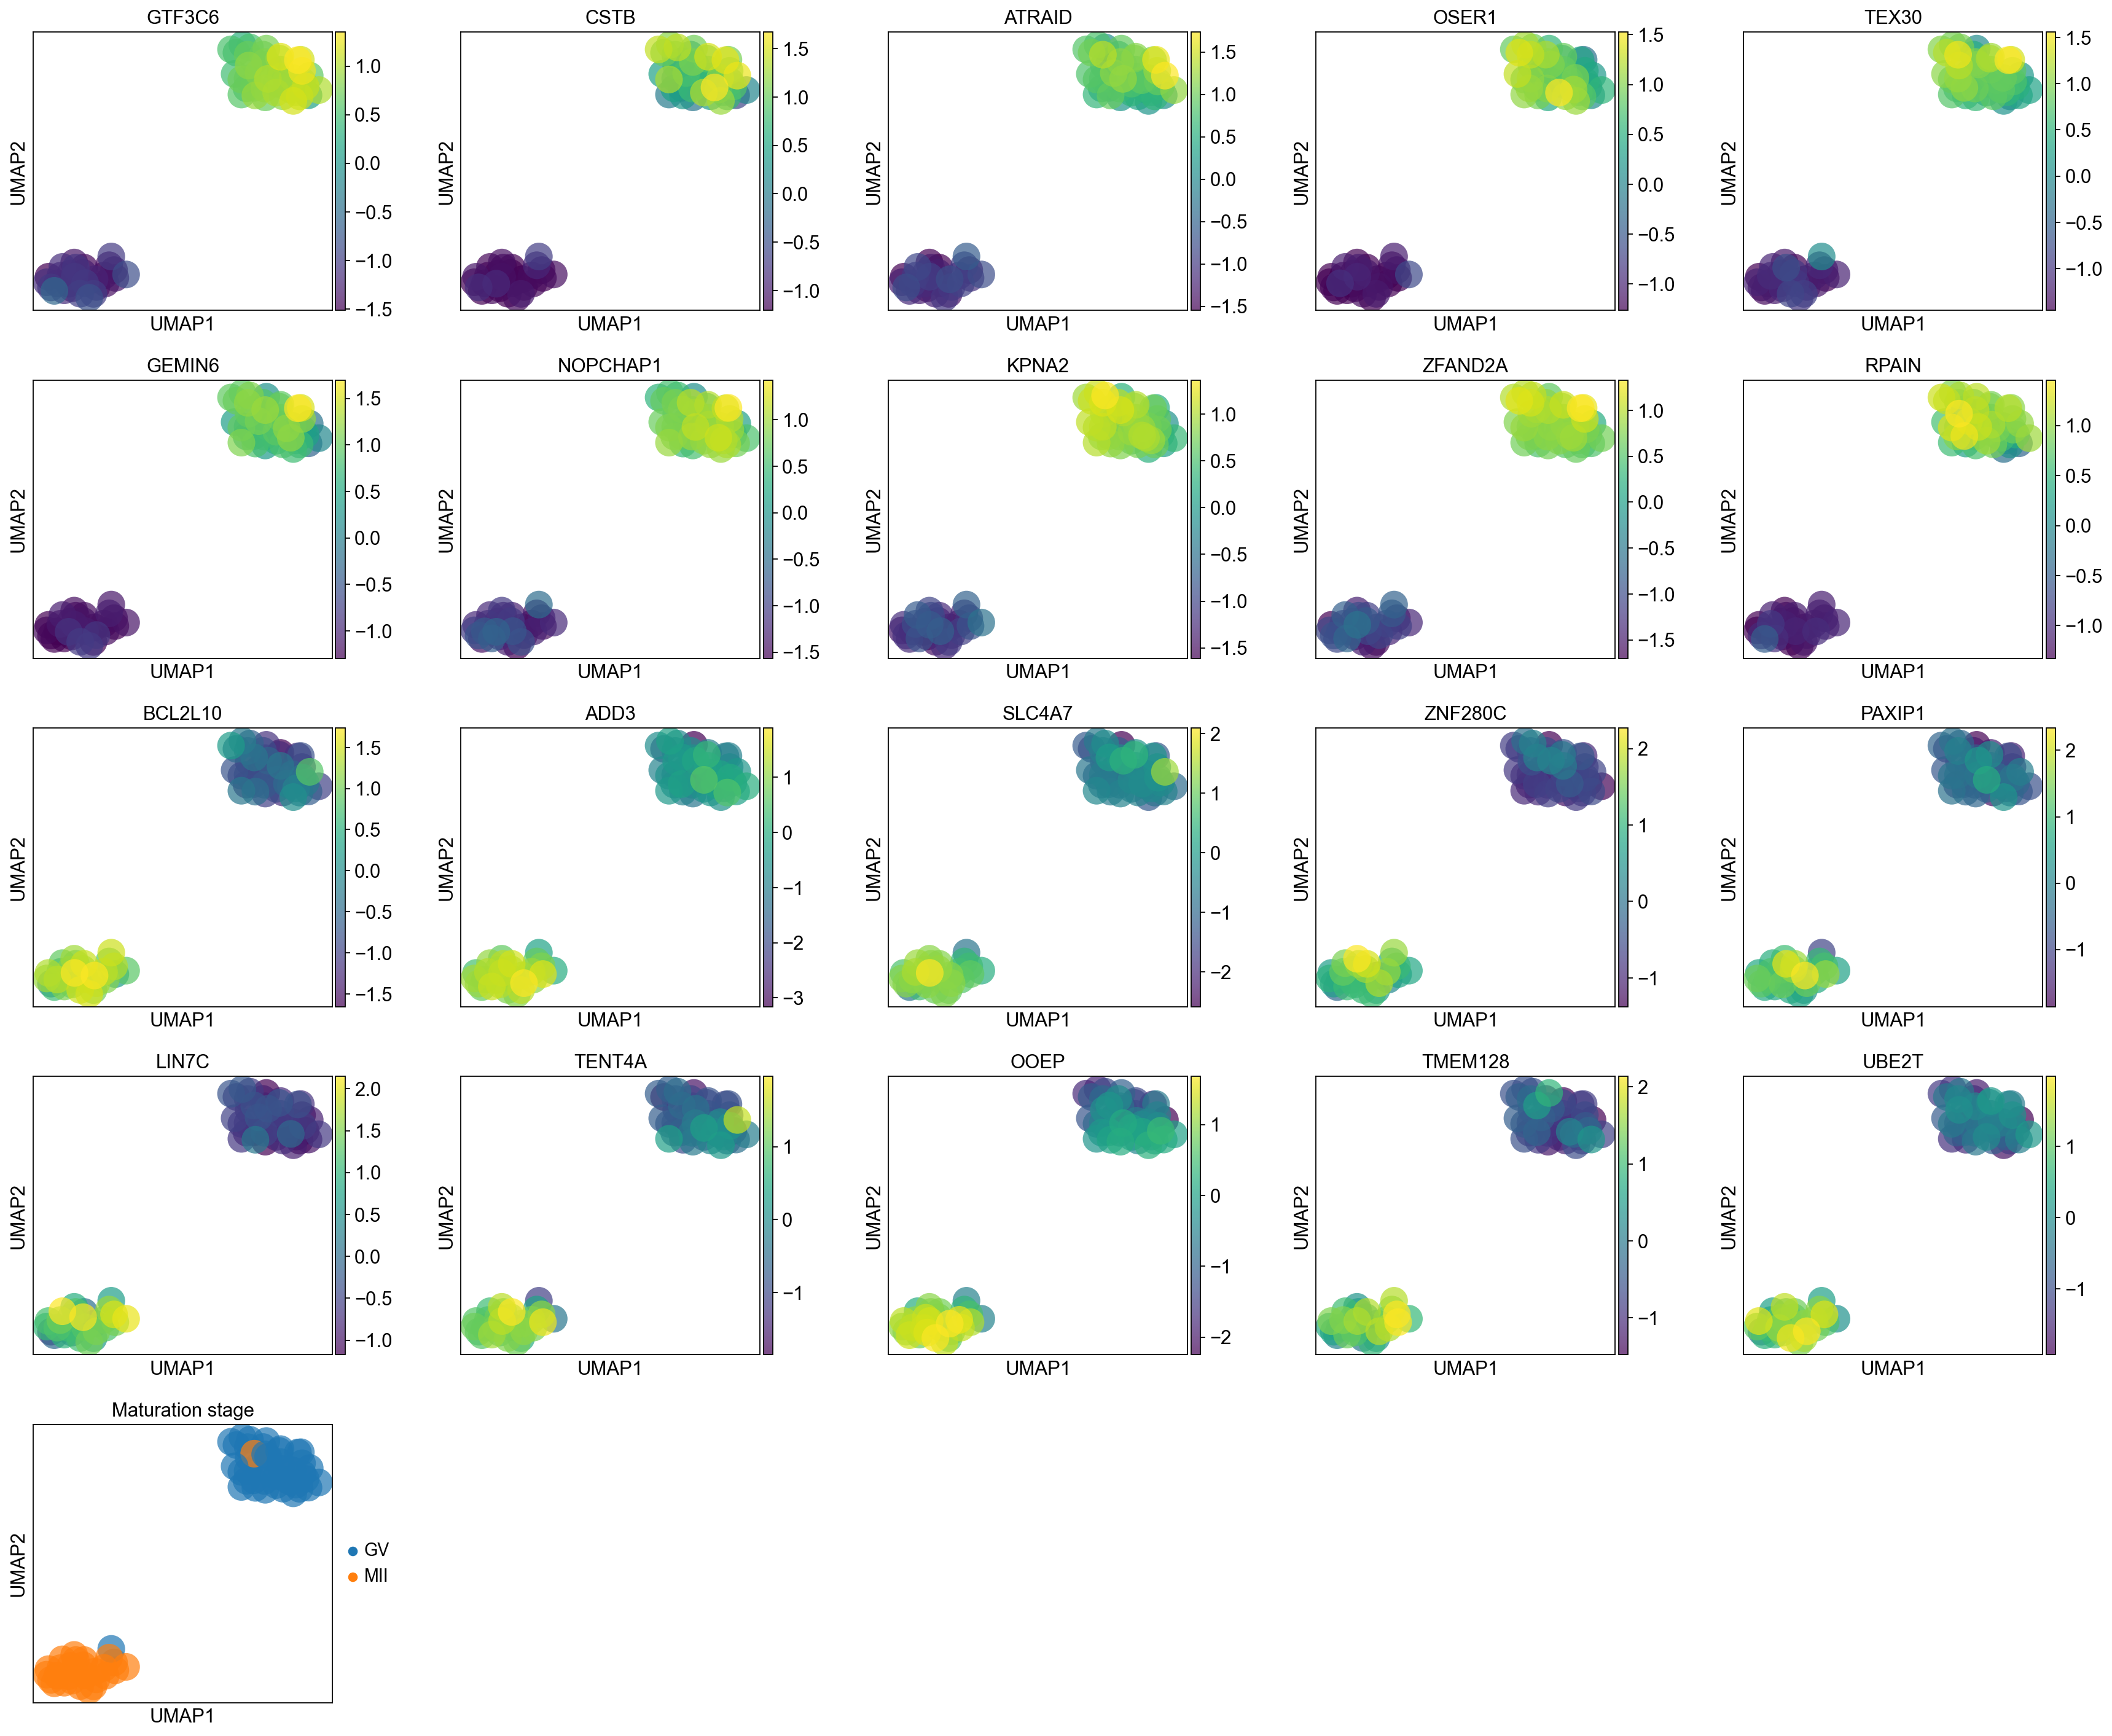

In [28]:
sc.pl.umap(geneExpMat_filtered,color=markers+['Maturation stage'],ncols=5,wspace=0.3,show=True,alpha=0.7)

In [29]:
layers_dict = {'mitochondrial gene expression':['MRPL27', 'MRPS22', 'MRPL20', 'COA3', 'MALSU1'],
'chromosome condensation':['CENPK', 'ADD3', 'HMGB2', 'NUDCD2', 'NCAPG2'],
'microtubule-organizing centre':['CETN3', 'RESF1', 'KIF3A', 'SCLT1', 'TUBE1']}

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:405: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(_matrix.stack(dropna=False))
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:461: FutureWarning: 

Passing `palette` wit

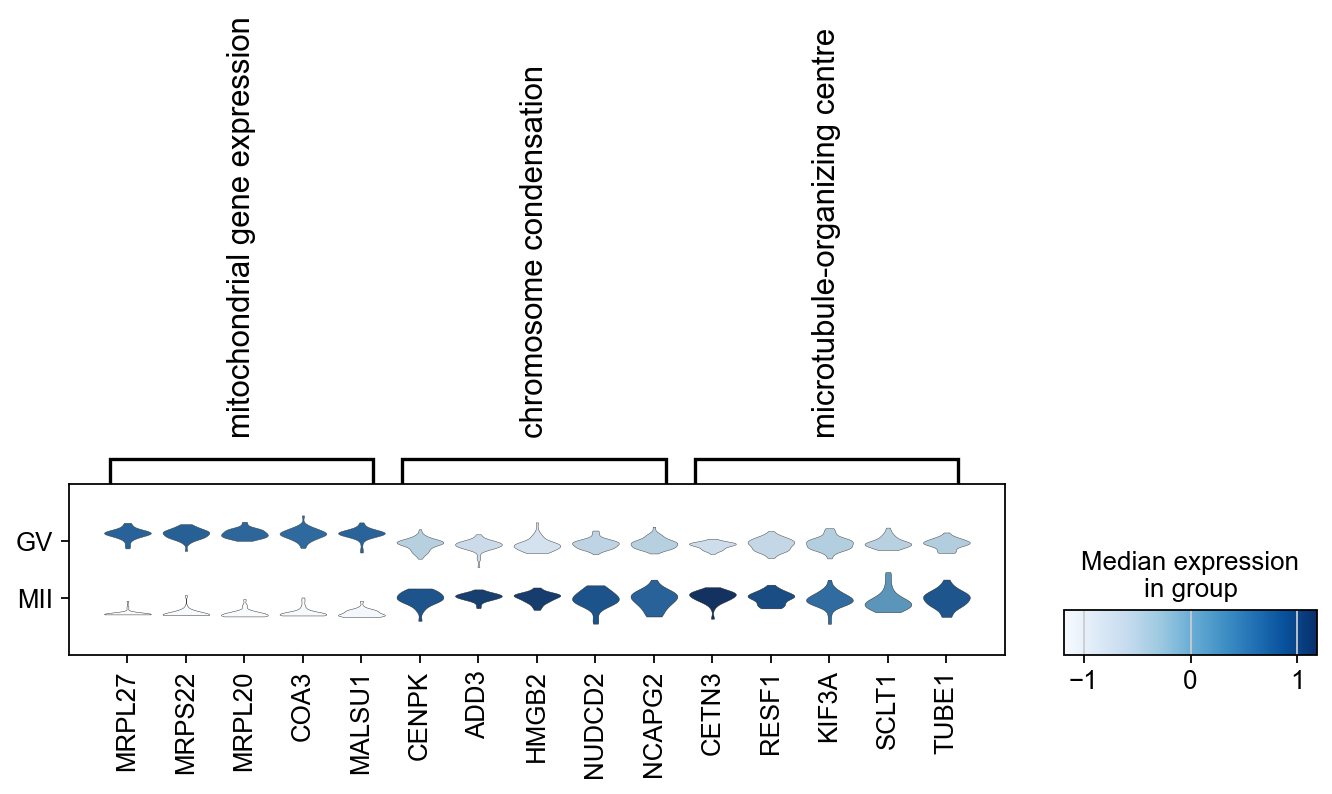

In [30]:
fig, ax= plt.subplots(figsize=(10,5))
sc.pl.stacked_violin(geneExpMat_filtered,layers_dict,groupby='Maturation stage',ax=ax)
fig.tight_layout()
fig.savefig(f'{path_out}stackedViolin_marker_genes_pathways.pdf')

In [31]:
markers_dict = {'Top 10 GV markers - from paper':['TRIM13', 'CSTB', 'RPL39L', 'GTF3C6', 'OSER1', 'PAIP2', 'GEMIN6', 'ANAPC13', 'ZFAND2A', 'DNAJC18'],
'Top 10 MII markers - from paper':['BCL2L10', 'ZNF280C', 'LIN7C', 'TMEM128', 'B3GNT2', 'MED30', 'OOEP', 'PAXIP1', 'ZNF738', 'KLHL28']}

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided

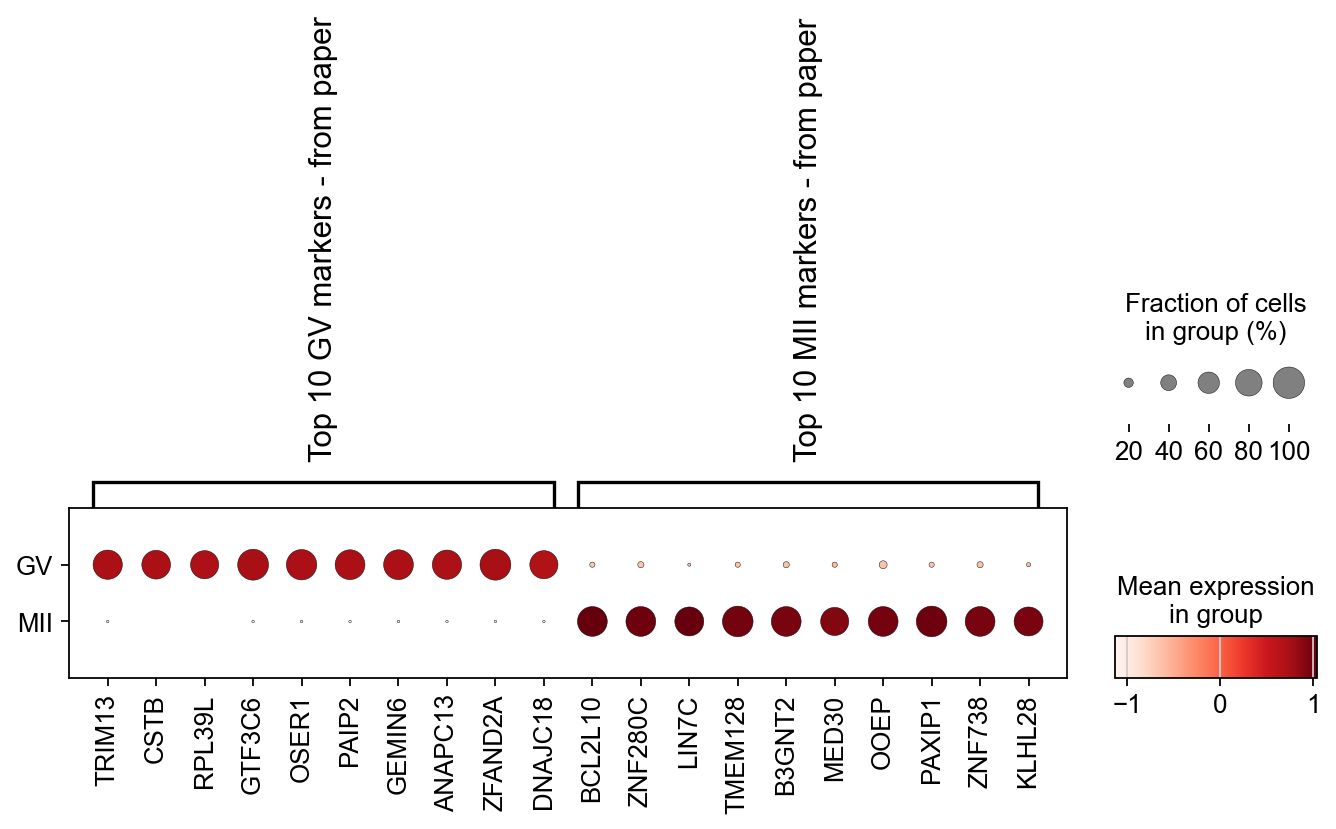

In [32]:
fig, ax= plt.subplots(figsize=(10,5))
sc.pl.dotplot(geneExpMat_filtered,markers_dict,groupby='Maturation stage',ax=ax)
fig.tight_layout()
fig.savefig(f'{path_out}dotplot_marker_genes_from_paper.pdf')

In [33]:
our_markers_dict = {'Top 10 GV markers':['GTF3C6', 'CSTB', 'ATRAID', 'OSER1', 'TEX30', 'GEMIN6', 'NOPCHAP1', 'KPNA2', 'ZFAND2A', 'RPAIN'],
'Top 10 MII markers':['BCL2L10', 'ADD3', 'SLC4A7', 'ZNF280C', 'PAXIP1', 'LIN7C', 'TENT4A', 'OOEP', 'TMEM128', 'UBE2T']}

/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/sci/courses/2023/92892/noa_gilad/.conda/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided

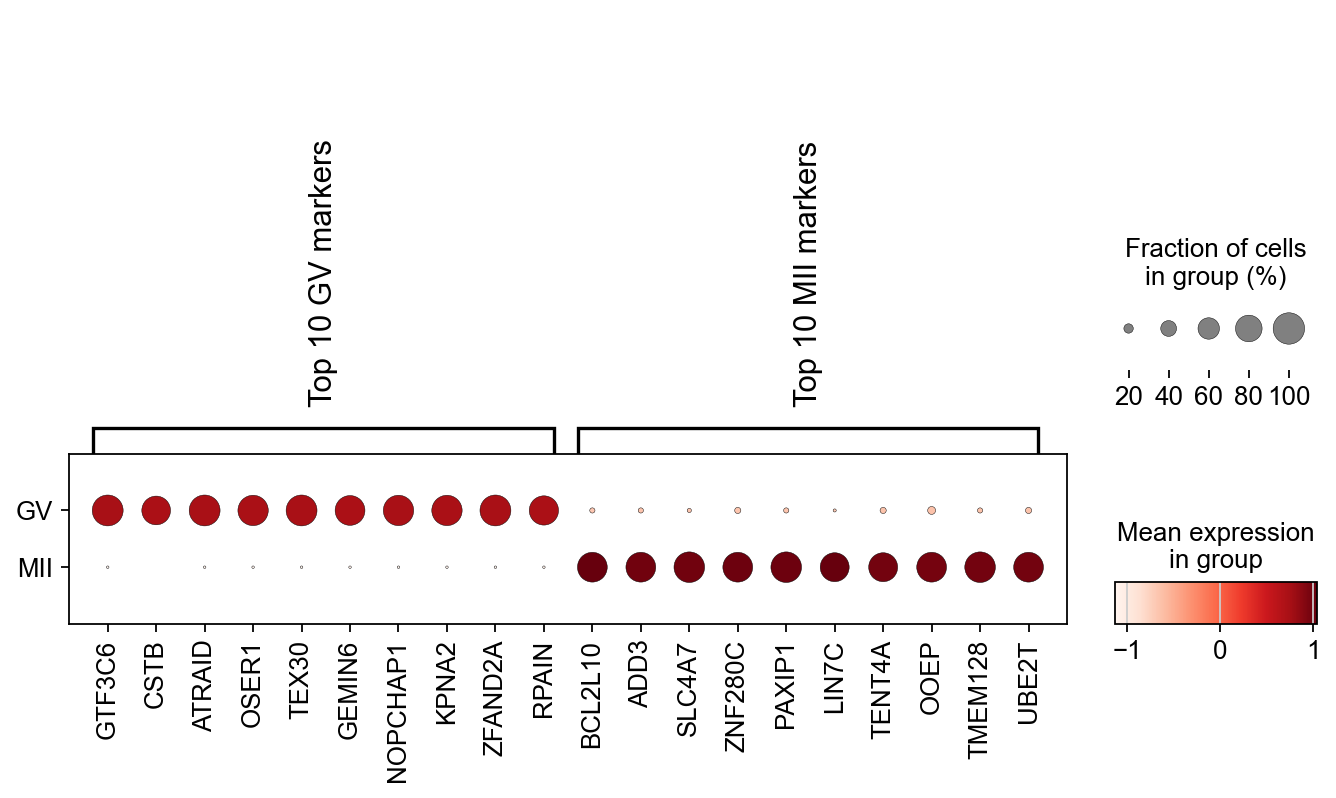

In [34]:
fig, ax= plt.subplots(figsize=(10,5))
sc.pl.dotplot(geneExpMat_filtered,our_markers_dict,groupby='Maturation stage',ax=ax)
fig.tight_layout()
fig.savefig(f'{path_out}dotplot_marker_genes_layers.pdf')